<a href="https://colab.research.google.com/github/Sabrina-Hendricks/DS4002-Group13-Project2/blob/main/Scripts/MI3_TrendAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Import data from github

In [3]:
url = 'https://raw.githubusercontent.com/Sabrina-Hendricks/DS4002-Group13-Project2/refs/heads/main/Data/Cleaned_Data.csv'
df = pd.read_csv(url)
df.head()

,category,service,year,quarter,spending
0,Outpatient services,Physician services,2004,Q1,306.6
1,Outpatient services,Dental services,2004,Q1,81.0
2,Outpatient services,Paramedical services,2004,Q1,188.0
3,Hospital and nursing home services,Hospitals,2004,Q1,518.4
4,Hospital and nursing home services,Nursing homes,2004,Q1,108.0


Visualizing trends in spending over time

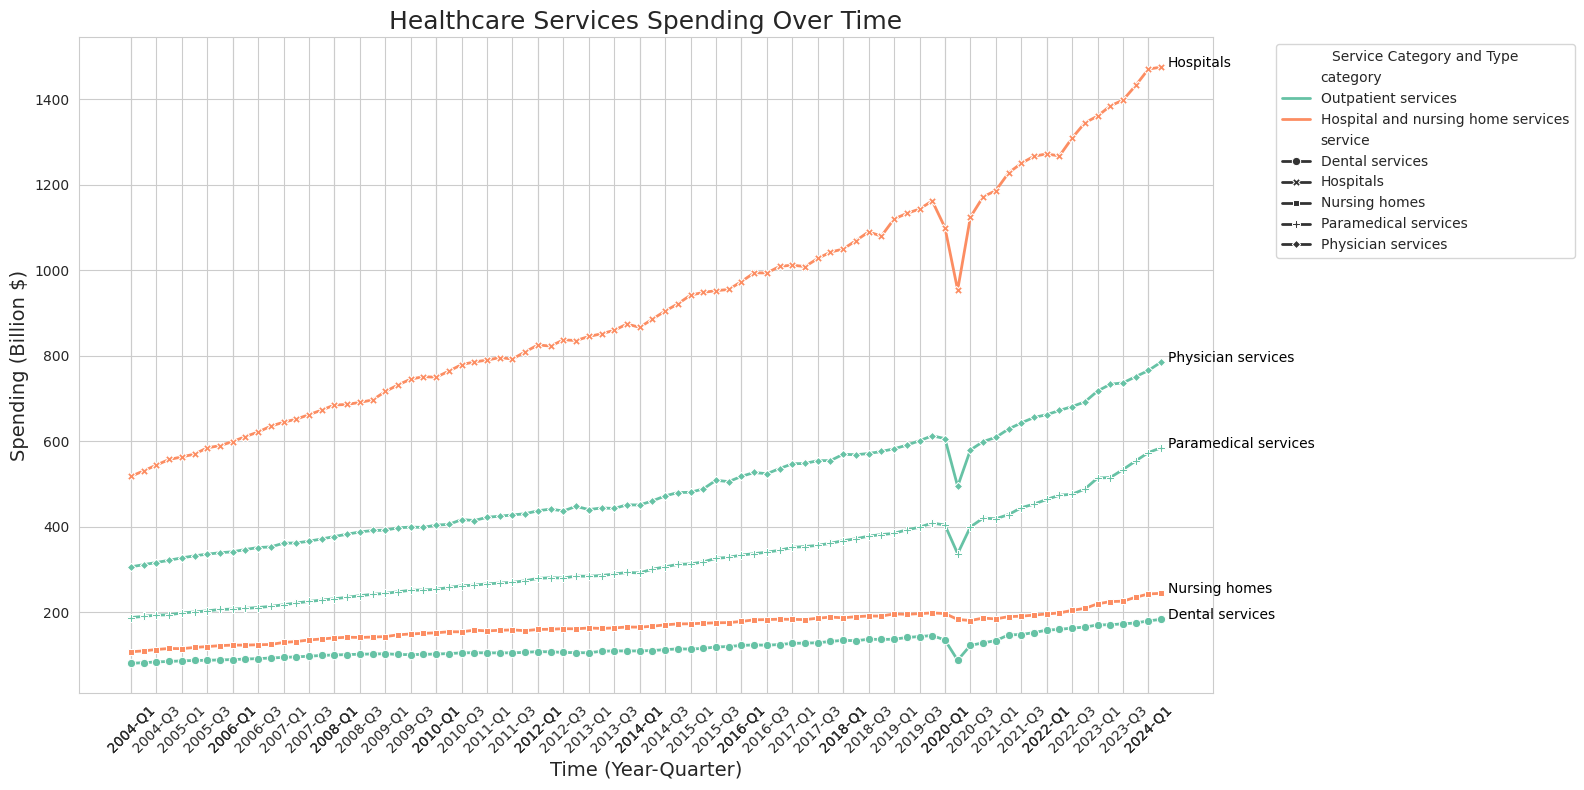

In [11]:
# Create a 'time' column in 'YYYY-Qx' format
df['time'] = df['year'].astype(str) + '-Q' + df['quarter'].str[-1]

# Sort the data by service and time
df = df.sort_values(by=['service', 'time'])

# Set plot size and style
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')

# Line plot with hue based on category
sns.lineplot(data=df, x='time', y='spending', hue='category', style='service',
             markers=True, dashes=False, palette='Set2', linewidth=2)

# Adjust x-axis ticks to avoid overcrowding
plt.xticks(df['time'][::8], rotation=45)  # Show every 8th time label

# Plot title and axis labels
plt.title('Healthcare Services Spending Over Time', fontsize=18)
plt.xlabel('Time (Year-Quarter)', fontsize=14)
plt.ylabel('Spending (Billion $)', fontsize=14)

# Add labels to each line at the end of their respective time series
for service in df['service'].unique():
    subset = df[df['service'] == service]
    # Adjust x and y position slightly for better visibility
    plt.text(
        len(subset) - 1 + 0.5,  # Slight x-offset to move right
        subset['spending'].iloc[-1],  # Y-position remains the same
        service, horizontalalignment='left', size='medium', color='black'
    )

# Move legend to the right outside the plot
plt.legend(title='Service Category and Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()